Fai unha aplicación de consola ou notebook que recolla unha foto e detecte as caras.

Logo aplica un blur á zona que conten cada unha das caras para que non poida ser identificado.

In [45]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [46]:
def difuminarCaras(imagen):
  face_cascade = cv.CascadeClassifier("haarcascade_frontalface_default.xml")

  faces = face_cascade.detectMultiScale(
    imagen,
    scaleFactor = 1.1,
    minNeighbors = 22,
    minSize = (30,30), 
      )
  print("Caras = ", len(faces))
  destino = imagen.copy()
  imagen_final = imagen.copy()
  for (x, y, w, h) in faces:
        # Recuadro verde
        cv.rectangle(destino, (x,y), (x+h, y+h), (0, 255, 0), 8)
        # Recorte de las cordenadas correspondientes a cada cara
        rostro = destino[y:y+h, x:x+w]
        # Se aplica difuminado
        rostro_difuminado = cv.GaussianBlur(rostro, (25, 25), 30)
        # Se coloca en las coordenadas de la cara original la cara difuminada
        destino[y:y+h, x:x+w] = rostro_difuminado

  plt.imshow(destino)
  plt.title('Caras difuminadas')
  
  plt.show()


Caras =  5


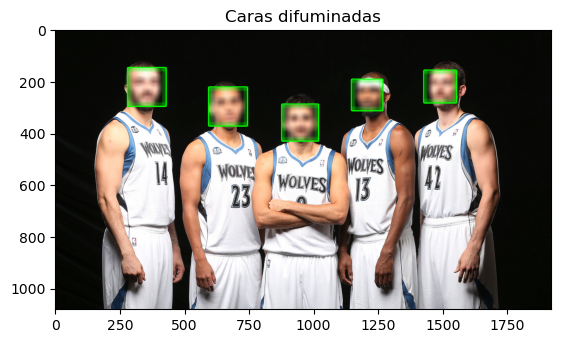

In [47]:
wolves = cv.imread("minnesota_timberwolves.jpg")
wolves_color = cv.cvtColor(wolves, cv.COLOR_BGR2RGB)
difuminarCaras(wolves_color)